# Project 0: Inaugural

Imports and set magics:

In [1]:
import numpy as np

from scipy import optimize

%matplotlib inline
import matplotlib.pyplot as plt # baseline modul

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject

# Question 1

We are given a quasi-linear utility function of the consumer. The consumer wants to maximize the utility by choosing the optimal level of consumption, c, and labor supply, l. We have chosen to solve the consumers problem with a solver.

**First of all**, we define the utility function, the consumers total resources and a function for printing the solution and we define given parameters. For a start, we have set w = 0.75, to show that the code solves the model.

In [2]:
# Functions used to solve the problem

# Define the utility function
def u_func(c,l,v,eps):
    utility = np.log(c)-v*(l**(1+(1/eps))/(1+(1/eps)))
    return utility

# Define total resources
def total_resources(m,w,l,tax0,tax1,k):
    x = m+w*l-(tax0*w*l+(tax1*np.fmax(w*l-k,0)))
    return x
 
 
# Define and specify print solution 
def print_solution(c,l,utility):
    print(f'c = {c:.4f}')
    print(f'l = {l:.4f}')
    print(f'u  = {utility:.4f}')

# Set parameters
m = 1
v = 10
eps = 0.3
tax0 = 0.4
tax1 = 0.1
k = 0.4
w = 0.75

The code used to solve the model is divided into the following steps:

**a.** We start by defining **the objective function**, where the value of choice is l (labor supply). In this function we specify that c (consumption) must equal x (total resources) when maximized. Maximizing utility is done by minimizing -u_func, where u_func is the utility function defined above.

**b.** Next, we **call the solver**. Here we specify that we use the method 'bounded', as we are looking for a local minimum of the objective function within the bounds of the value we want to maximize with respect to. It is given that l ∈ (0,1), so bounds is set to this interval. Furthermore, the extra arguments in the objective function are specified.

**c.** At last, we unpack the **solution** and print it using our print function. The solution gives us the consumer's optimal level of consumption, c, and the optimal level of labor supply, l, which implies a maximized utility, u.

In [3]:
# a. Define the objective function
def value_of_choice(l,m,w,tax0,tax1,k,eps,v):
    c =  total_resources(m,w,l,tax0,tax1,k)
    return -u_func(c,l,v,eps)


# b. Call the solver
sol_case1 = optimize.minimize_scalar(
    value_of_choice,method='bounded',
    bounds=(0,1),args=(m,w,tax0,tax1,k,eps,v))

# c. Unpack and print the solution: 
l = sol_case1.x
c = total_resources(m,w,l,tax0,tax1,k)
utility = u_func(c,l,v,eps)
print_solution(c,l,utility)

c = 1.1694
l = 0.3763
u  = 0.1230


# Question 2

We want to plot the optimal consumption level and labor supply as functions of the wage, w.

We define a vector of wages in the range 0.5 to 1.5 using numpy linspace called w_vec. Furthermore, we define labor supply l as a numpy array of N zeros. This is called l_values.

Next, we solve the problem of maximizing utility for every w in w_vec and thus find the optimal labor supply l for every w in w_vec. The solutions of optimal labor supply are saved in l_values.

Finally, we plot labor supply (l_values) as a function of wages in a figure called fig_l and we plot consumption c as a function of wages in a figure called fig_c.

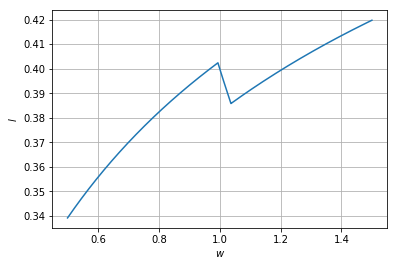

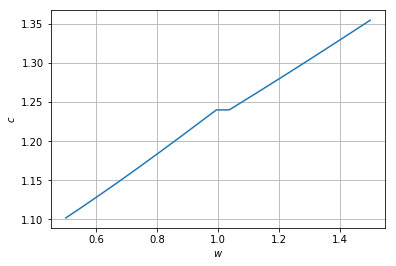

In [5]:
# Define values
N = 10000
w_vec = np.linspace(0.5,1.5,N)
l_values = np.zeros(N)

for i, w in enumerate(w_vec): 
    sol_case1 = optimize.minimize_scalar(
    value_of_choice,method='bounded',
    bounds=(0,1),args=(m,w,tax0,tax1,k,eps,v))
    l_values[i] = sol_case1.x

c_values_alt = total_resources(m,w_vec,l_values,tax0,tax1,k)

# Plot labor as a function of wage
fig_l = plt.figure()
ax = fig_l.add_subplot(1,1,1)
ax.plot(w_vec, l_values)

# Add labels
ax.set_xlabel('$w$')
ax.set_ylabel('$l$')
ax.grid(True)

# Plot consumption as a function of wage 
fig_c = plt.figure()
ax2 = fig_c.add_subplot(1,1,1)
ax2.plot(w_vec,c_values_alt)

# Add labels
ax2.set_xlabel('$w$')
ax2.set_ylabel('$c$')
ax2.grid(True)

The first figure show that labor supply of an individual increase in the wage, but when the wage is just around 1, the labor supply decreases in the wage. In the interval where the slope is negative, individuals decrease their labor supply to stay just below the threshold for paying top tax, $\kappa=0.4$. When the wage increase further, it becomes optimal to increase labor supply in spite of the top tax.

The second figure shows that consumption is increasing in the wage untill the wage is just below 1, where consumption does not increase, but is constant. This is because individuals can decrease labor supply and thus avoid the top tax at this wage level, while the level of consumption stays the same. When the wage increase further, it again becomes optimal to consume more when wage increases.

# Question 3

We seek to calculate the tax revenue:

$$
\begin{aligned}
T = \sum_{i=1}^{N} [\tau_{0}w_{i}l^{*}_{i}+\tau_{1}max\{w_{i}l^{*}_{i}-k,0\}]
\end{aligned}
$$
For a population with N = 10.000 individuals indexed by $i$.

It is assumed that distribution of wages is uniform, such that:

$$
\begin{aligned}
w_{i}\sim\mathcal{U}(0.5,1.5)
\end{aligned}
$$
We solve the problem in the following steps

a. First, we define the population size N = 10.000 and specify that w is uniformly distributed between 0.5 and 1.5. Also we define labor supply and the tax revenue, tax_i, for every individual i.

b. We call the solver, such that utility is maximized for every individual i with wage w, which is drawn from the uniform distribution as specified above. Furthermore, we calculate the tax revenue for every consumer, i, who has maximzed utility.

c. We calculate the total tax revenue with numpy sum, which sums tax revenue for all individuals i.

In [6]:
# a. Define N, seed and define w as a uniform distribution from 0.5 to 1.5
np.random.seed(888)
N = 10000
w_uni = np.random.uniform(0.5,1.5, size=N)

l_values = np.zeros(N)
tax_i = np.zeros(N)

# b. Call the solver for each individual
for i, w in enumerate(w_uni):
    sol_case1 = optimize.minimize_scalar(
    value_of_choice,method='bounded',
    bounds=(0,1),args=(m,w,tax0,tax1,k,eps,v))
    l_values[i] = sol_case1.x
    tax_i = tax0*w_uni*l_values+tax1*np.fmax(w_uni*l_values-k,0)
    
# Calculate total tax revenue
total_tax = np.sum(tax_i)
print(f'Total tax revenue = {total_tax:.4f}')

Total tax revenue = 1637.5474


# Question 4

We wish to examine what the tax revenue would be if the Frischian elasticity decrease to $\varepsilon=0.1$

We now redefine the parameter eps = 0.1 and call the solver again for every individual i with a wage w in order to calculate the total tax revenue for $\varepsilon=0.1$.

In [7]:
np.random.seed(888)

#For every individual i, we set parameters, where epsilon is now eps = 0.1: 
eps = 0.1

for i, w in enumerate(w_uni):
    
    # We call the solver for ever individual i, and calculate the tax revenue from every individual: 
    sol_case1 = optimize.minimize_scalar(value_of_choice,method='bounded',
    bounds=(0,1),args=(m,w,tax0,tax1,k,eps,v))
    l_values[i] = sol_case1.x
    tax_i = tax0*w_uni*l_values+tax1*np.fmax(w_uni*l_values-k,0)

# We calculate the total tax revenue by summing the tax revenue from every individual and print the result: 
total_tax = np.sum(tax_i)
print(f'Total tax revenue = {total_tax:.4f}')

Total tax revenue = 3210.0936


Thus, we find that the total tax revenue is higher the lower the Frischian elasticity is.

The Frischian elasticity measures the elasticity of labor with respect to the wage, holding the marginal utility of wealth fixed. Thus, it measures the substitution effect of a change in the wage on the labor supply.

The tax revenue is higher because a lower Frischian elasticity implies that the individuals will substitute less towards leisure when taxes are increased. Hence labor supply does not react as strong to taxes, ceteris paribus, implying higher tax revenue.

(In general, there are no income effects with quasilinear utility, as we have here, only substitution effects)

# Question 5

We consider a politician who would like to maximize tax revenues. We are asked to give the politician a recommendation of which $\tau_{0}$, $\tau_{1}$ and $\kappa$ to choose, in order to maximize tax revenue.

We use a multidimensional solver to solve the politicians problem, because we maximize tax revenue with respect to $\tau_{0}$, $\tau_{1}$ and $\kappa$. We define a function called 'total_taxes', which returns the total tax revenue when all N individuals maximize utility. We then use the solver to mininmize -'total_taxes'.


We solve the politician's problem for the two Frisch elasticities, which we have worked with:

**1.** First, we solve the politicians problem for $\varepsilon=0.3$, and 

**2.** then, we solve the problem for $\varepsilon=0.1$.

**Before solving;** define l_values and a function to print the solution to the problem

In [8]:
l_values = np.zeros(N)

# Define function to print the solution
def print_solution(t0,t1,k,tt):
    print(f'tax0 = {t0:.4f}')
    print(f'tax1 = {t1:.4f}')
    print(f'k  = {k:.4f}')
    print(f'total tax revenue = {tt:.4f}') 

**1.** Max tax revenue for Frisch elasticity $\varepsilon=0.3$

In [9]:
# a. Define total tax function, which returns the total tax revenue
def total_taxes(m,v,tax0,tax1,k,eps,w_uni,l_values):

    # Solve the consumer problem for each individual and calculate tax revenue from each individual
    for i,w in enumerate(w_uni):
        sol_case1 = optimize.minimize_scalar(
            value_of_choice,method='bounded',
            bounds=(0,1),args=(m,w,tax0,tax1,k,eps,v))
        l_values[i] = sol_case1.x
        tax_i = tax0*w_uni*l_values+tax1*np.fmax(w_uni*l_values-k,0)

    # total tax revenue    
    total_tax = np.sum(tax_i)

    return total_tax

# b. Define the objective function where epsilon = 0.3
def value_of_choi(x,w_uni,l_values):
    tax0 = x[0]
    tax1 = x[1]
    k = x[2]
    return -total_taxes(1,10,tax0,tax1,k,0.3,w_uni,l_values)

# c. Bounds of the variables and an initial guess
bounds = ((0,1),(0,1),(0,1))
initial_guess = [0.5,0.5,0.5]

# d. Call solver
sol_case2 = optimize.minimize(
    value_of_choi,initial_guess,args=(w_uni,l_values),
    method='SLSQP',bounds=bounds)

# e. Unpack the solution
tax0 = sol_case2.x[0]
tax1 = sol_case2.x[1]
k = sol_case2.x[2]
total_t = total_taxes(1,10,tax0,tax1,k,0.3,w_uni,l_values)

# Print the solution
print_solution(tax0,tax1,k,total_t)

tax0 = 0.7855
tax1 = 0.3376
k  = 0.5952
total tax revenue = 2477.6922


**2.** Max tax revenue for Frisch elasticity $\varepsilon=0.1$

In [13]:
# b. Define the objective function where epsilon = 0.1
def value_of_choi(x,w_uni,l_values):
    tax0 = x[0]
    tax1 = x[1]
    k = x[2]
    return -total_taxes(1,10,tax0,tax1,k,0.1,w_uni,l_values)

# c. Bounds of the variables and an initial guess
bounds = ((0,1),(0,1),(0,1))
initial_guess = [0.5,0.5,0.5]

# d. Call solver
sol_case2 = optimize.minimize(
    value_of_choi,initial_guess,args=(w_uni,l_values),
    method='SLSQP',bounds=bounds)

# e. Unpack the solution
tax0 = sol_case2.x[0]
tax1 = sol_case2.x[1]
k = sol_case2.x[2]
tt = total_taxes(1,10,tax0,tax1,k,0.1,w_uni,l_values)

# Print the solution
print_solution(tax0,tax1,k,tt)

tax0 = 0.9143
tax1 = 0.8953
k  = 0.8776
total_tax = 5647.1661


In **1.** where $\varepsilon=0.3$, we find that tax revenue is maximized when $\tau_{0}=0.7855$, $\tau_{1}=0.3376$ and $\kappa=0.5952$. This returns a tax revenue of 2477.6922.

In **2.** where $\varepsilon=0.1$, we find that tax revenue is maximized when $\tau_{0}=0.9143$, $\tau_{1}=0.8953$ and $\kappa=0.8776$. This returns a tax revenue of 5647.1661.

Thus, when the elasticity is lower and individuals therefore respond less to tax changes; The policimakers can gain higher tax revenues from increaseing taxes.

# Conclusion

In question 1, utility is maximized when the consumer choose consumption; c = 1.16935252 and labor supply; l = 0.37633892. This implies a utility of u = 0.12302908.

In question 2 we see that labor supply increase in the wage, except when the wage is about 1, where it is most optimal for individals to decrease labor supply and avoid the threshold for paying top tax. We see from the plot of consumption as a function of the wage, that consumption increase with the wage except for when the wage is about 1, where it is optimal to keep consumption constant, decrease labor supply and thus avoid paying top tax.

In question 3 we calculate that the total tax revenue, given as the sum of the tax revenue from every consumer's tax payment, after every consumer have maximized their uility, is 1637.5474.

In question 4 we see that this tax revenue increase to 3210.0936, when the Frisch elasticity of labor supply is decreased to 0.1. This is because a lower elasticity imply that individuals respond less to higher taxes when they choose their optimal labor supply.

In question 5 we seek to find the policy, which maximize the total tax revenue. We find that policy $\tau_{0}=0.7855$, $\tau_{1}=0.3376$ and $\kappa=0.5952$ returns the highest possible tax revenue when the Frisch elasticity is $\varepsilon=0.3$. In this case, the tax revenue is 2477.6922. When the Frisch easticity is reduced to $\varepsilon=0.1$, we find that the optimal policy is $\tau_{0}=0.9143$, $\tau_{1}=0.8953$ and $\kappa=0.8776$. This returns a tax revenue of 5647.1661. So, we can conclude that when indivicuals respond less to higher taxes, policymakers can a higher tax revenue by increasing taxes.